In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Import dataset

In [2]:
train = pd.read_csv('cs-training.csv')
test = pd.read_csv('cs-test.csv')

# Explore dataset

In [8]:
train.shape

(150000, 12)

In [3]:
train.head()

,Unnamed: 0,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,1,1,0.766127,45,2,0.802982,9120.0,13,0,6,0,2.0
1,2,0,0.957151,40,0,0.121876,2600.0,4,0,0,0,1.0
2,3,0,0.658180,38,1,0.085113,3042.0,2,1,0,0,0.0
3,4,0,0.233810,30,0,0.036050,3300.0,5,0,0,0,0.0
4,5,0,0.907239,49,1,0.024926,63588.0,7,0,1,0,0.0


In [4]:
# explore the data and find out the NA values
train.isnull().sum()

Unnamed: 0                                  0
SeriousDlqin2yrs                            0
RevolvingUtilizationOfUnsecuredLines        0
age                                         0
NumberOfTime30-59DaysPastDueNotWorse        0
DebtRatio                                   0
MonthlyIncome                           29731
NumberOfOpenCreditLinesAndLoans             0
NumberOfTimes90DaysLate                     0
NumberRealEstateLoansOrLines                0
NumberOfTime60-89DaysPastDueNotWorse        0
NumberOfDependents                       3924
dtype: int64

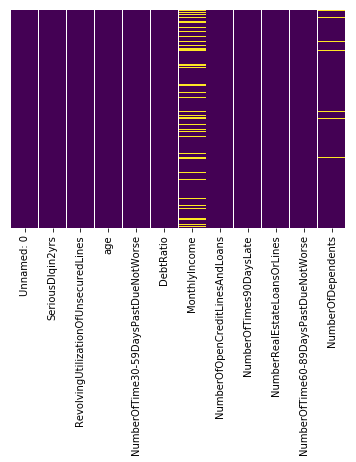

In [9]:
sns.heatmap(train.isnull(),yticklabels = False,cbar = False,cmap = 'viridis')

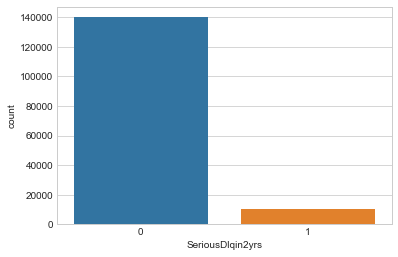

In [10]:
# explore the target and noticed that it is highly unbalanced
# Clearly, the target value is a factor which only has two levels. Hence, classification models will be used.
sns.set_style('whitegrid')
sns.countplot(x ='SeriousDlqin2yrs',data = train )

In [13]:
test.shape

(101503, 12)

In [12]:
test.head()

,Unnamed: 0,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,1,NaN,0.885519,43,0,0.177513,5700.0,4,0,0,0,0.0
1,2,NaN,0.463295,57,0,0.527237,9141.0,15,0,4,0,2.0
2,3,NaN,0.043275,59,0,0.687648,5083.0,12,0,1,0,2.0
3,4,NaN,0.280308,38,1,0.925961,3200.0,7,0,2,0,0.0
4,5,NaN,1.000000,27,0,0.019917,3865.0,4,0,0,0,1.0


In [14]:
# test dataset also has NA values that need to be dealt with
test.isnull().sum()

Unnamed: 0                                   0
SeriousDlqin2yrs                        101503
RevolvingUtilizationOfUnsecuredLines         0
age                                          0
NumberOfTime30-59DaysPastDueNotWorse         0
DebtRatio                                    0
MonthlyIncome                            20103
NumberOfOpenCreditLinesAndLoans              0
NumberOfTimes90DaysLate                      0
NumberRealEstateLoansOrLines                 0
NumberOfTime60-89DaysPastDueNotWorse         0
NumberOfDependents                        2626
dtype: int64

# Deal with missing data

In [15]:
# fill in NA values with median of its respective columns 
train['MonthlyIncome']=train['MonthlyIncome'].fillna(value=train['MonthlyIncome'].median())
train['NumberOfDependents']=train['NumberOfDependents'].fillna(value=train['NumberOfDependents'].median())

In [16]:
# column Unnamed is not used
train.drop('Unnamed: 0',axis = 1,inplace=True)

In [17]:
# check new dataset
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 11 columns):
SeriousDlqin2yrs                        150000 non-null int64
RevolvingUtilizationOfUnsecuredLines    150000 non-null float64
age                                     150000 non-null int64
NumberOfTime30-59DaysPastDueNotWorse    150000 non-null int64
DebtRatio                               150000 non-null float64
MonthlyIncome                           150000 non-null float64
NumberOfOpenCreditLinesAndLoans         150000 non-null int64
NumberOfTimes90DaysLate                 150000 non-null int64
NumberRealEstateLoansOrLines            150000 non-null int64
NumberOfTime60-89DaysPastDueNotWorse    150000 non-null int64
NumberOfDependents                      150000 non-null float64
dtypes: float64(4), int64(7)
memory usage: 12.6 MB


In [18]:
test['MonthlyIncome']=test['MonthlyIncome'].fillna(value=test['MonthlyIncome'].median())
test['NumberOfDependents']=test['NumberOfDependents'].fillna(value=test['NumberOfDependents'].median())
test.drop('Unnamed: 0',axis = 1,inplace=True)
test.drop('SeriousDlqin2yrs',axis = 1,inplace=True)

In [19]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101503 entries, 0 to 101502
Data columns (total 10 columns):
RevolvingUtilizationOfUnsecuredLines    101503 non-null float64
age                                     101503 non-null int64
NumberOfTime30-59DaysPastDueNotWorse    101503 non-null int64
DebtRatio                               101503 non-null float64
MonthlyIncome                           101503 non-null float64
NumberOfOpenCreditLinesAndLoans         101503 non-null int64
NumberOfTimes90DaysLate                 101503 non-null int64
NumberRealEstateLoansOrLines            101503 non-null int64
NumberOfTime60-89DaysPastDueNotWorse    101503 non-null int64
NumberOfDependents                      101503 non-null float64
dtypes: float64(4), int64(6)
memory usage: 7.7 MB


# Oversampling
## In order to deal with unbalanced dataset, over-sampling is applied to build a balanced dataset.

In [20]:
from sklearn.utils import resample

In [21]:
train_majority = train[train.SeriousDlqin2yrs == 0]
train_minority = train[train.SeriousDlqin2yrs == 1]
n = train_majority.shape[0]
# Upsample minority class by randomly select from minority class with replacement
train_minority_upsampled = resample(train_minority,
                                     replace = True,
                                     n_samples = n,
                                     random_state = 0)

# Combine minority class with downsampled majority class
train_upsampled = pd.concat([train_minority_upsampled, train_majority])
# Check the constructed target frequency
train_upsampled.SeriousDlqin2yrs.value_counts()

1    139974
0    139974
Name: SeriousDlqin2yrs, dtype: int64

In [22]:
X = train_upsampled.drop('SeriousDlqin2yrs',axis=1)
y = train_upsampled['SeriousDlqin2yrs']

# Train and Test Split
## 20% dataset is used as test dataset and the rest will be used as training dataset.

In [23]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(train_upsampled.drop('SeriousDlqin2yrs',axis=1), 
                                                    train_upsampled['SeriousDlqin2yrs'], test_size=0.2, 
                                                    random_state=101)


# Modeling and Model Selection
## There are a lot of models for classification. The most commonly used models are selected to be trained. Cross validated AUC and test AUC will be considered to select the optimal model. 

# Logistic Regression

In [24]:
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LogisticRegressionCV
from sklearn import metrics, cross_validation
from sklearn.metrics import roc_auc_score

/Users/allen/python3-env/lib/python3.6/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [26]:
clf1_predicted = cross_validation.cross_val_predict(LogisticRegression(),X_train, y_train, cv=10)

In [32]:
y_train.shape

(223958,)

In [31]:
clf1_predicted.shape

(223958,)

In [28]:
print(metrics.roc_auc_score(y_train,clf1_predicted))

0.715417330586


In [36]:
LogisticRegression().get_params()

{'C': 1.0,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'max_iter': 100,
 'multi_class': 'ovr',
 'n_jobs': 1,
 'penalty': 'l2',
 'random_state': None,
 'solver': 'liblinear',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

In [25]:
clf1_predicted = cross_validation.cross_val_predict(LogisticRegression(),X_train, y_train, cv=10)
print metrics.roc_auc_score(y_train,clf1_predicted)

SyntaxError: invalid syntax (<ipython-input-25-79065bd93b9f>, line 2)

In [19]:
clf1 = LogisticRegressionCV(cv = 10)

In [20]:
clf1.fit(X_train,y_train)

LogisticRegressionCV(Cs=10, class_weight=None, cv=10, dual=False,
           fit_intercept=True, intercept_scaling=1.0, max_iter=100,
           multi_class='ovr', n_jobs=1, penalty='l2', random_state=None,
           refit=True, scoring=None, solver='lbfgs', tol=0.0001, verbose=0)

In [21]:
clf1_test = clf1.predict(X_test)
print metrics.roc_auc_score(y_test,clf1_test)

0.724841474715


In [22]:
clf1.fit(X,y)

LogisticRegressionCV(Cs=10, class_weight=None, cv=10, dual=False,
           fit_intercept=True, intercept_scaling=1.0, max_iter=100,
           multi_class='ovr', n_jobs=1, penalty='l2', random_state=None,
           refit=True, scoring=None, solver='lbfgs', tol=0.0001, verbose=0)

In [23]:
clf1_pred = clf1.predict_proba(test)

# Random Forest

In [24]:
from sklearn.ensemble import RandomForestClassifier
clf2_predicted = cross_validation.cross_val_predict(RandomForestClassifier(),X_train , y_train, cv=10)

In [25]:
print metrics.roc_auc_score(y_train,clf2_predicted)

0.983936338555


In [26]:
clf2 = RandomForestClassifier(n_estimators=100)

In [27]:
clf2.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=100, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False)

In [28]:
clf2_test = clf2.predict(X_test)
print metrics.roc_auc_score(y_test,clf2_test)

0.985154352476


In [29]:
clf2.fit(X,y)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=100, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False)

In [30]:
clf2_pred = clf2.predict_proba(test)

# K neareast Neighbours

In [31]:
from sklearn.neighbors import KNeighborsClassifier

In [32]:
clf3_predicted = cross_validation.cross_val_predict(KNeighborsClassifier(),X_train , y_train, cv=10)

In [33]:
print metrics.roc_auc_score(y_train,clf3_predicted)

0.913202034543


In [34]:
clf3 = KNeighborsClassifier()

In [35]:
clf3.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [36]:
clf3_test = clf3.predict(X_test)
print metrics.roc_auc_score(y_test,clf3_test)

0.92032627762


In [37]:
clf3.fit(X,y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [38]:
clf3_pred = clf3.predict_proba(test)

# SVM

In [39]:
#from sklearn.svm import SVC

In [40]:
#clf4_predicted = cross_validation.cross_val_predict(SVC(),X_train , y_train, cv=10)
#print metrics.accuracy_score(y_train, clf4_predicted)

In [41]:
#clf4 = SVC()
#clf4.fit(X,y)
#clf4_pred = clf4.predict_proba(test)

# Stochastic Gradient Descent

In [42]:
from sklearn.linear_model import SGDClassifier

In [43]:
clf5_predicted = cross_validation.cross_val_predict(SGDClassifier(),X_train , y_train, cv=10)

In [44]:
print metrics.roc_auc_score(y_train,clf5_predicted)

0.515115106992


In [45]:
clf5 = SGDClassifier(loss = "log")

In [46]:
clf5.fit(X_train,y_train)

SGDClassifier(alpha=0.0001, average=False, class_weight=None, epsilon=0.1,
       eta0=0.0, fit_intercept=True, l1_ratio=0.15,
       learning_rate='optimal', loss='log', n_iter=5, n_jobs=1,
       penalty='l2', power_t=0.5, random_state=None, shuffle=True,
       verbose=0, warm_start=False)

In [47]:
clf5_test = clf5.predict(X_test)
print metrics.roc_auc_score(y_test,clf5_test)

0.493600795818


In [48]:
clf5.fit(X,y)
clf5_pred = clf5.predict_proba(test)

/anaconda/lib/python2.7/site-packages/sklearn/linear_model/base.py:352: RuntimeWarning: overflow encountered in exp
  np.exp(prob, prob)


# Extra Tree Classifier

In [49]:
from sklearn.ensemble import ExtraTreesClassifier

In [50]:
clf6_predicted = cross_validation.cross_val_predict(ExtraTreesClassifier(),X_train , y_train, cv=10)

In [51]:
print metrics.roc_auc_score(y_train,clf6_predicted)

0.989563033668


In [52]:
clf6 = ExtraTreesClassifier()

In [53]:
clf6.fit(X_train,y_train)

ExtraTreesClassifier(bootstrap=False, class_weight=None, criterion='gini',
           max_depth=None, max_features='auto', max_leaf_nodes=None,
           min_impurity_split=1e-07, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False)

In [54]:
clf6_test = clf6.predict(X_test)
print metrics.roc_auc_score(y_test,clf6_test)

0.990222585579


In [55]:
clf6.fit(X,y)
clf6_pred = clf6.predict_proba(test)

# Gradient Boosting Classifier

In [56]:
from sklearn.ensemble import GradientBoostingClassifier

In [57]:
clf7_predicted = cross_validation.cross_val_predict(GradientBoostingClassifier(),X_train , y_train, cv=10)

In [58]:
print metrics.roc_auc_score(y_train,clf7_predicted)

0.790413872586


In [59]:
clf7 = GradientBoostingClassifier()

In [60]:
clf7.fit(X_train,y_train)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_split=1e-07, min_samples_leaf=1,
              min_samples_split=2, min_weight_fraction_leaf=0.0,
              n_estimators=100, presort='auto', random_state=None,
              subsample=1.0, verbose=0, warm_start=False)

In [61]:
clf7_test = clf6.predict(X_test)
print metrics.roc_auc_score(y_test,clf7_test)

0.999588482026


In [62]:
clf7.fit(X,y)
clf7_pred = clf7.predict_proba(test)

# Final Selection

### Extra Tree Classifier and Random Forest are the optimal models according to their validated AUC and AUC of test dataset. We also noticed that the Gradient Boosting Classifier has a relatively low validated AUC but the highest AUC of test sample. 

In [69]:
# sample result from random forest
labels = range(1,len(test)+1)
clf2_result = pd.DataFrame(clf2_pred,index=labels,columns='Probability 1-Probablity'.split())['Probability']
clf2_result.to_csv('RandomForest-Up.csv',index = True)

# Future Work

### Tuning and regularition shall be done by cross validation. Since the over-sampling method has higher risk of oversampling, undersampling shall also be done to compare the results. Ensembled result from multiple models shall also be considered.

# Optional Questions
### My initial Analysis of the dataset is contained in the data exploration part.
### I used both validated AUC and test AUC to select the optimal model.
### AUC is selected because the target is highly biased. Even if all the predictions are 0, the accuracy is still high enough. However, it does not have too much meaning if so. Hence AUC is considered to deal with the highly skewed dataset.

In [40]:
a = np.matrix([[0,1], [1,1]])

In [41]:
a

matrix([[0, 1],
        [1, 1]])

In [42]:
import math
e = np.matrix([[2,2], [1+math.sqrt(5), 1-math.sqrt(5)]])

In [43]:
e

matrix([[ 2.        ,  2.        ],
        [ 3.23606798, -1.23606798]])

In [46]:
a_inv = np.linalg.inv(a)

In [47]:
a_inv

matrix([[-1.,  1.],
        [ 1.,  0.]])

In [50]:
a_change = np.linalg.inv(e)*a*e

In [53]:
a_change*a_change

matrix([[  2.61803399e+00,  -8.56647771e-17],
        [  1.70687606e-16,   3.81966011e-01]])

In [54]:
a_change

matrix([[  1.61803399e+00,  -8.56647771e-17],
        [  1.70687606e-16,  -6.18033989e-01]])

In [63]:
a_change = a_change*a_change

In [64]:
a_change

matrix([[  2.61803399e+00,  -8.56647771e-17],
        [  1.70687606e-16,   3.81966011e-01]])

In [66]:
e*a_change*np.linalg.inv(e)

matrix([[ 1.,  1.],
        [ 1.,  2.]])

In [72]:
np.power(2,32)

4294967296